# Brexit Scenario#

1. March EU concil transition (0=rules out transition, 1=greenlights transition)
2. Parliment approves withdrawal (0=does not approve, 1=approve)
3. UK parliment approves EU deal (0=does not approve, 1=approve, 2=does not exist)
4. Early election (0=no, 1=yes, 2=DNE)
5. Government type (0=Tory, 1=Labour, 2=DNE)
6. Government action (0=UK seeks reversal, 1=Article 50 extension, 2="No Deal" deal, 3=WTO, 4=DNE)
7. 2nd referendum vote (0=rejected, 1=approved, 2=DNE)
8. Government action on 2nd referendum vote (0=renewal, 1=Article 50 extension, 2=WTO, 3=DNE)

In [9]:
import networkx as nx
import pgmpy
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from pgmpy.inference import VariableElimination

C:\Users\barry\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\barry\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\barry\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\barry\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

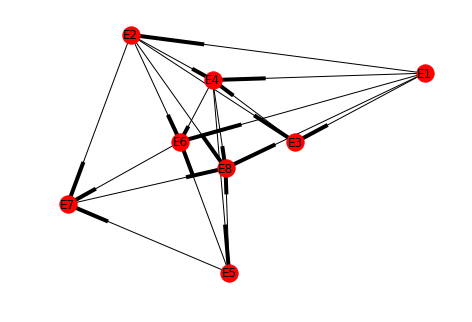

In [10]:
edge = [('E1','E2'),('E2','E3'),('E1','E3'),('E1','E4'),('E2','E4'),
        ('E3','E4'),('E4','E5'),('E1','E6'),('E2','E6'),('E4','E6'),
        ('E5','E6'),('E6','E7'),('E2','E7'),('E5','E7'),('E1','E8'),
        ('E2','E8'),('E4','E8'),('E5','E8'),('E7','E8')]

G = nx.DiGraph()
G.add_nodes_from(['E1','E2','E3','E4','E5','E6','E7','E8'])
G.add_edges_from(edge)
list(G.successors('E7'))
nx.draw(G, with_labels = True)
plt.show()

In [11]:
e1 = [[0.4,0.6]]
e2 = [[0.4,0.4],[0.6,0.6]]
e3 = [[0,0,0,0.2],[0,0,0,0.8],[1,1,1,0]]
e4 = [[0,0,0.3,0,0,0,0,0,0.2,0.2,0,0],[0,0,0.7,0,0,0,0,0,0.8,0.8,0,0],[1,1,0,1,1,1,1,1,0,0,1,1]]
e5 = [[0,0.4,0],[0,0.6,0],[1,0,1]]
e6 = [[0,0,0.1,0.1,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0.1,0.2,0.3,0,0,0,0,0,0,0.05,0.1,0.2,0,0,0,0],
      [0,0,0.4,0.3,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0.4,0.4,0.4,0,0,0,0,0,0,0.50,0.5,0.7,0,0,0,0],
      [0,0,0.3,0.4,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0,0,0.3,0.3,0.2,0,0,0,0,0,0,0.00,0.0,0.0,0,0,0,0],
      [0,0,0.2,0.2,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0.2,0.1,0.1,0,0,0,0,0,0,0.45,0.4,0.1,0,0,0,0],
      [1,1,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,0.0,1,1,0.0,0.0,0.0,1,1,1,1,1,1,0.00,0.0,0.0,1,1,1,1]]
e7 = [[0.45,0.45,0.45,0.45,0.45,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0.55,0.55,0.55,0.55,0.55,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
e8 = [[0,0,0.6,0.2,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0.4,0.6,0.7,0,0,0,0,0,0,0.3,0.4,0.7,0,0,0,0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0,0,0.4,0.8,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0,0,0.6,0.4,0.3,0,0,0,0,0,0,0.7,0.6,0.3,0,0,0,0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [12]:
model = BayesianModel([('E1','E2'),('E2','E3'),('E1','E3'),('E1','E4'),('E2','E4'),
                       ('E3','E4'),('E4','E5'),('E1','E6'),('E2','E6'),('E4','E6'),('E5','E6'),
                      ('E6','E7'),('E2','E7'),('E5','E7'),('E1','E8'),('E2','E8'),('E4','E8'),('E5','E8'),('E7','E8')])

In [13]:
E1 = TabularCPD(variable='E1', variable_card=2, values=e1)


E2 = TabularCPD(variable = 'E2',variable_card = 2, values = e2,
                                                   evidence = ['E1'],
                                                   evidence_card = [2])

E3 = TabularCPD(variable = 'E3',variable_card = 3, values = e3,
                                                   evidence = ['E1','E2'],
                                                   evidence_card = [2,2])

E4 = TabularCPD(variable = 'E4',variable_card = 3, values = e4,
                                                   evidence = ['E1','E2','E3'],
                                                   evidence_card = [2,2,3])

E5 = TabularCPD(variable = 'E5',variable_card = 3, values = e5,
                                                   evidence = ['E4'],
                                                   evidence_card = [3])

E6 = TabularCPD(variable = 'E6',variable_card = 5, values = e6,
                                                   evidence = ['E1','E2','E4','E5'],
                                                   evidence_card = [2,2,3,3])

E7 = TabularCPD(variable = 'E7',variable_card = 3, values = e7,
                                                   evidence = ['E6','E2','E5'],
                                                   evidence_card = [5,2,3])

E8 = TabularCPD(variable = 'E8',variable_card = 3, values = e8,
                                                   evidence = ['E7','E1','E2','E4','E5'],
                                                   evidence_card = [3,2,2,3,3])

In [14]:
model.add_cpds(E1,E2,E3,E4,E5,E6,E7,E8)

model.check_model()

True

In [15]:
infer = VariableElimination(model)
print(infer.query(['E8'])['E8'])

╒══════╤═══════════╕
│ E8   │   phi(E8) │
╞══════╪═══════════╡
│ E8_0 │    0.0284 │
├──────┼───────────┤
│ E8_1 │    0.0272 │
├──────┼───────────┤
│ E8_2 │    0.9444 │
╘══════╧═══════════╛
